# Building an Object Detection Client Application

In [32]:
import os, sys, inspect, json
import skil, skil_client

from skil import Skil, get_service_by_id, Service
from skil import get_experiment_by_id, get_model_by_id, get_workspace_by_id, get_deployment_by_id

# Import modules from parent folder
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 

from utils import annotate_image

# Resize image
def resize_scale(img, height_limit=1500, width_limit=1500):
    height, width = img.shape[:2]

    height_ratio = height_limit/height
    width_ratio = width_limit/width

    scale = min(height_ratio, width_ratio)

    return cv2.resize(img, (int(scale*width), int(scale*height)))

## Initial SKIL Service

In [33]:
skil_server = Skil(
    host          = 'localhost',
    port          = 9008,
    user_id       = 'admin',
    password      = 'Skymind'
)

'>>> Authenticating SKIL...'
'>>> Done!'


In [3]:
with open('service.json') as FILE:
    config = json.load(FILE)
config

{'deployment_id': '1',
 'experiment_id': 'yolo-experiment-01',
 'model_entity_id': 2,
 'model_id': 'yolo-model-01',
 'model_name': 'yolo-model',
 'workspace_id': '42ec8ddc-0f03-4e5b-8213-b1c639a54d61'}

In [4]:
service = get_service_by_id(
    skil_server,
    config['experiment_id'],
    config['model_id'],
    config['deployment_id']
)

## Run YOLO-v2 Detection Inference

In [49]:
import skil, requests, cv2, json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def predict(image_name, threshold=0.5):   
    # Object Detection
    original_img  = resize_scale(cv2.imread('../images/'+image_name+'.jpg'))
    detections    = service.detect_objects(original_img)
    annotated_img = annotate_image(original_img, detections)
    
    # visualize detections
    plt.figure(figsize=(15,15))
    plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
    plt.show()
    
    # show outputs
    print(json.dumps(detections['objects'][0], indent=4, sort_keys=True))
    
    # save detections
    with open('../detections/'+image_name+'.json', 'w') as outfile:  
        json.dump(detections, outfile, indent=4, sort_keys=True)

    # save annotated image
    cv2.imwrite('annotated.jpg', annotated_img)

## Visualize Detections

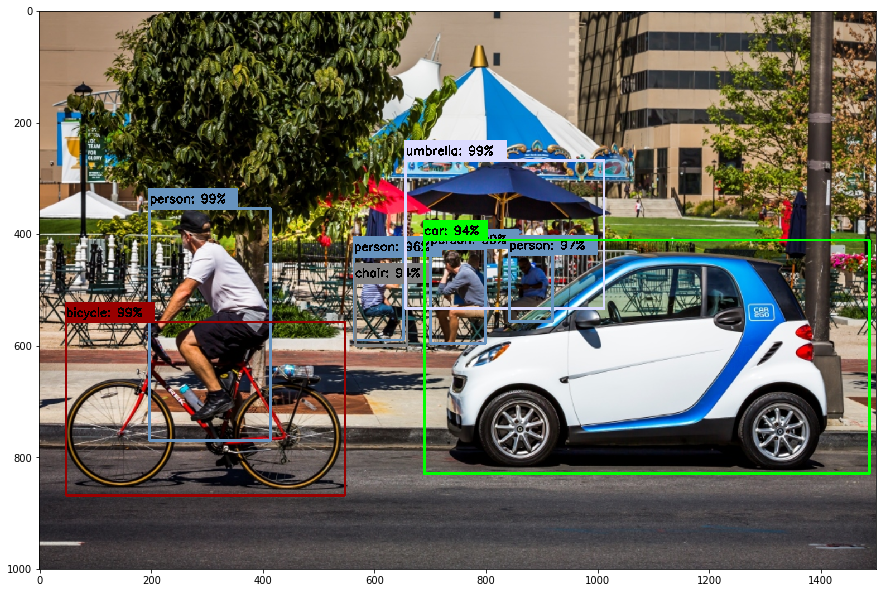

{
    "centerX": 306.0,
    "centerY": 561.0,
    "confidences": [
        0.99961215,
        0.00024007041,
        4.0523166e-05,
        3.8346734e-05,
        1.568048e-05,
        1.2241016e-05,
        8.19375e-06,
        6.563125e-06,
        2.4454216e-06,
        1.7269687e-06
    ],
    "height": 416.0,
    "predictedClassNumbers": [
        0,
        56,
        1,
        58,
        60,
        13,
        25,
        26,
        38,
        39
    ],
    "predictedClasses": [
        "person",
        "chair",
        "bicycle",
        "pottedplant",
        "diningtable",
        "bench",
        "umbrella",
        "handbag",
        "tennis racket",
        "bottle"
    ],
    "width": 216.0
}


In [50]:
predict(image_name='img-1')

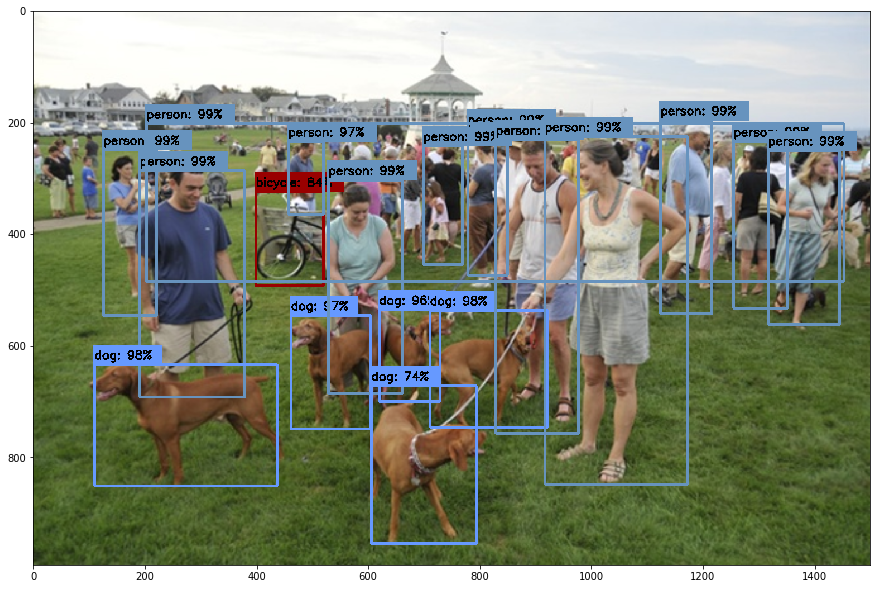

{
    "centerX": 174.0,
    "centerY": 398.0,
    "confidences": [
        0.99905545,
        0.000130001,
        8.395465e-05,
        6.596203e-05,
        6.333907e-05,
        5.9775513e-05,
        5.5011777e-05,
        4.7766807e-05,
        3.274756e-05,
        3.1620053e-05
    ],
    "height": 296.0,
    "predictedClassNumbers": [
        0,
        24,
        1,
        17,
        26,
        37,
        33,
        25,
        3,
        56
    ],
    "predictedClasses": [
        "person",
        "backpack",
        "bicycle",
        "horse",
        "handbag",
        "surfboard",
        "kite",
        "umbrella",
        "motorbike",
        "chair"
    ],
    "width": 95.0
}


In [57]:
predict(image_name='img-7')

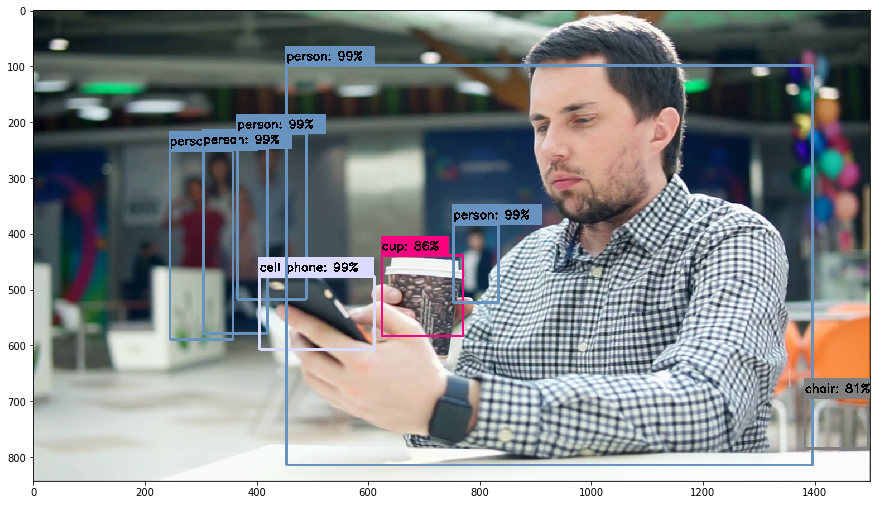

{
    "centerX": 302.0,
    "centerY": 420.0,
    "confidences": [
        0.99510646,
        0.0025128,
        0.00057291996,
        0.00016804234,
        0.00016304909,
        0.000106563006,
        8.9839945e-05,
        8.971947e-05,
        8.888036e-05,
        8.601175e-05
    ],
    "height": 338.0,
    "predictedClassNumbers": [
        0,
        39,
        56,
        12,
        62,
        10,
        41,
        2,
        13,
        73
    ],
    "predictedClasses": [
        "person",
        "bottle",
        "chair",
        "parking meter",
        "tvmonitor",
        "fire hydrant",
        "cup",
        "car",
        "bench",
        "book"
    ],
    "width": 113.0
}


In [59]:
predict(image_name='img-9')